# Evaluate Anomalies

In [1]:
import os
import arrow
import pandas as pd
import time 
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

In [2]:
cwd = os.getcwd()
print(cwd)
data_fn = os.path.join(cwd, 'data_modelling')
fig_fn = os.path.join(cwd, 'figs')
print(data_fn)

/Users/torge/Development/master/masterthesis_code/02_Experimente/DataGenerator
/Users/torge/Development/master/masterthesis_code/02_Experimente/DataGenerator/data_modelling


## Import Data

In [3]:
normal_h5_fn = os.path.join(data_fn, 'simulation_data_reduced.h5')
simulation_data = pd.read_hdf(normal_h5_fn, key='df')
normal_data = simulation_data.loc['2021-01-01 00:00:00':'2021-12-31 23:45:00'].copy()
del(simulation_data)

In [5]:
anormal_h5_fn = os.path.join(data_fn, 'anomalous_data_y_2022_reduced.h5')
anormal_data = pd.read_hdf(anormal_h5_fn, key='df')

In [6]:
normal_data.head()

,line_1_1_loading,line_2_3_loading,line_3_4_loading,line_4_5_loading,line_5_6_loading,line_7_8_loading,line_8_9_loading,line_9_10_loading,line_10_11_loading,line_3_8_loading,line_12_13_loading,line_13_14_loading,line_6_7_loading,line_11_14_loading,line_14_8_loading,trafo_0_loading,trafo_1_loading
2021-01-01 00:00:00,24.644473,20.131101,8.404872,7.058014,2.865729,4.337964,7.136024,2.829874,2.875793,12.656436,1.386398,0.480776,0.092008,0.187712,0.038735,5.497073,0.374605
2021-01-01 00:15:00,21.790400,17.948475,7.670718,6.389197,2.648196,4.053554,6.380672,2.528290,2.573173,11.468529,1.804625,0.619204,0.092209,0.188139,0.038747,4.855954,0.487610
2021-01-01 00:30:00,19.278630,16.028356,7.015811,5.801115,2.449640,3.786643,5.728396,2.268028,2.311765,10.422091,2.156886,0.736068,0.092387,0.188516,0.038757,4.291608,0.582790
2021-01-01 00:45:00,17.169135,14.410755,6.460969,5.303823,2.280746,3.558796,5.178226,2.048673,2.091190,9.537306,2.447429,0.832563,0.092537,0.188835,0.038765,3.818051,0.661295
2021-01-01 01:00:00,15.598922,13.203294,6.040075,4.931252,2.150115,3.378654,4.772639,1.887093,1.928513,8.873382,2.652278,0.900637,0.092649,0.189073,0.038771,3.465591,0.716645


In [7]:
anormal_data.head()

,line_1_1_loading,line_2_3_loading,line_3_4_loading,line_4_5_loading,line_5_6_loading,line_7_8_loading,line_8_9_loading,line_9_10_loading,line_10_11_loading,line_3_8_loading,line_12_13_loading,line_13_14_loading,line_6_7_loading,line_11_14_loading,line_14_8_loading,trafo_0_loading,trafo_1_loading,label
2022-01-01 00:00:00,26.428520,21.452790,8.891055,7.444716,3.037907,4.610939,7.495388,2.973418,3.019734,13.358919,1.163668,0.407310,0.091884,0.187451,0.038728,5.900799,0.314423,0.0
2022-01-01 00:15:00,25.896197,20.991977,8.791365,7.280360,3.045330,4.683295,7.208438,2.858809,2.904788,13.087107,1.282060,0.446331,0.091923,0.187537,0.038732,5.784789,0.346413,0.0
2022-01-01 00:30:00,25.463283,20.609252,8.714208,7.140668,3.057351,4.758147,6.955072,2.757632,2.803286,12.858003,1.362674,0.472940,0.091954,0.187609,0.038734,5.690839,0.368195,0.0
2022-01-01 00:45:00,24.761865,20.034252,8.557081,6.947434,6.093356,4.772942,6.667855,2.642956,2.688216,12.528500,1.452854,0.502738,0.092005,0.187719,0.038737,5.535474,0.392561,2.0
2022-01-01 01:00:00,23.329116,18.921626,8.195697,6.598575,5.996231,4.662767,6.246847,2.474905,2.519524,11.914256,1.623898,0.559330,0.092106,0.187936,0.038741,5.214227,0.438777,2.0


In [10]:
cols = ['line_1_1_loading',
       'line_5_6_loading',
       'line_2_3_loading',
       'line_11_14_loading',
       'trafo_1_loading',
       'line_7_8_loading',]

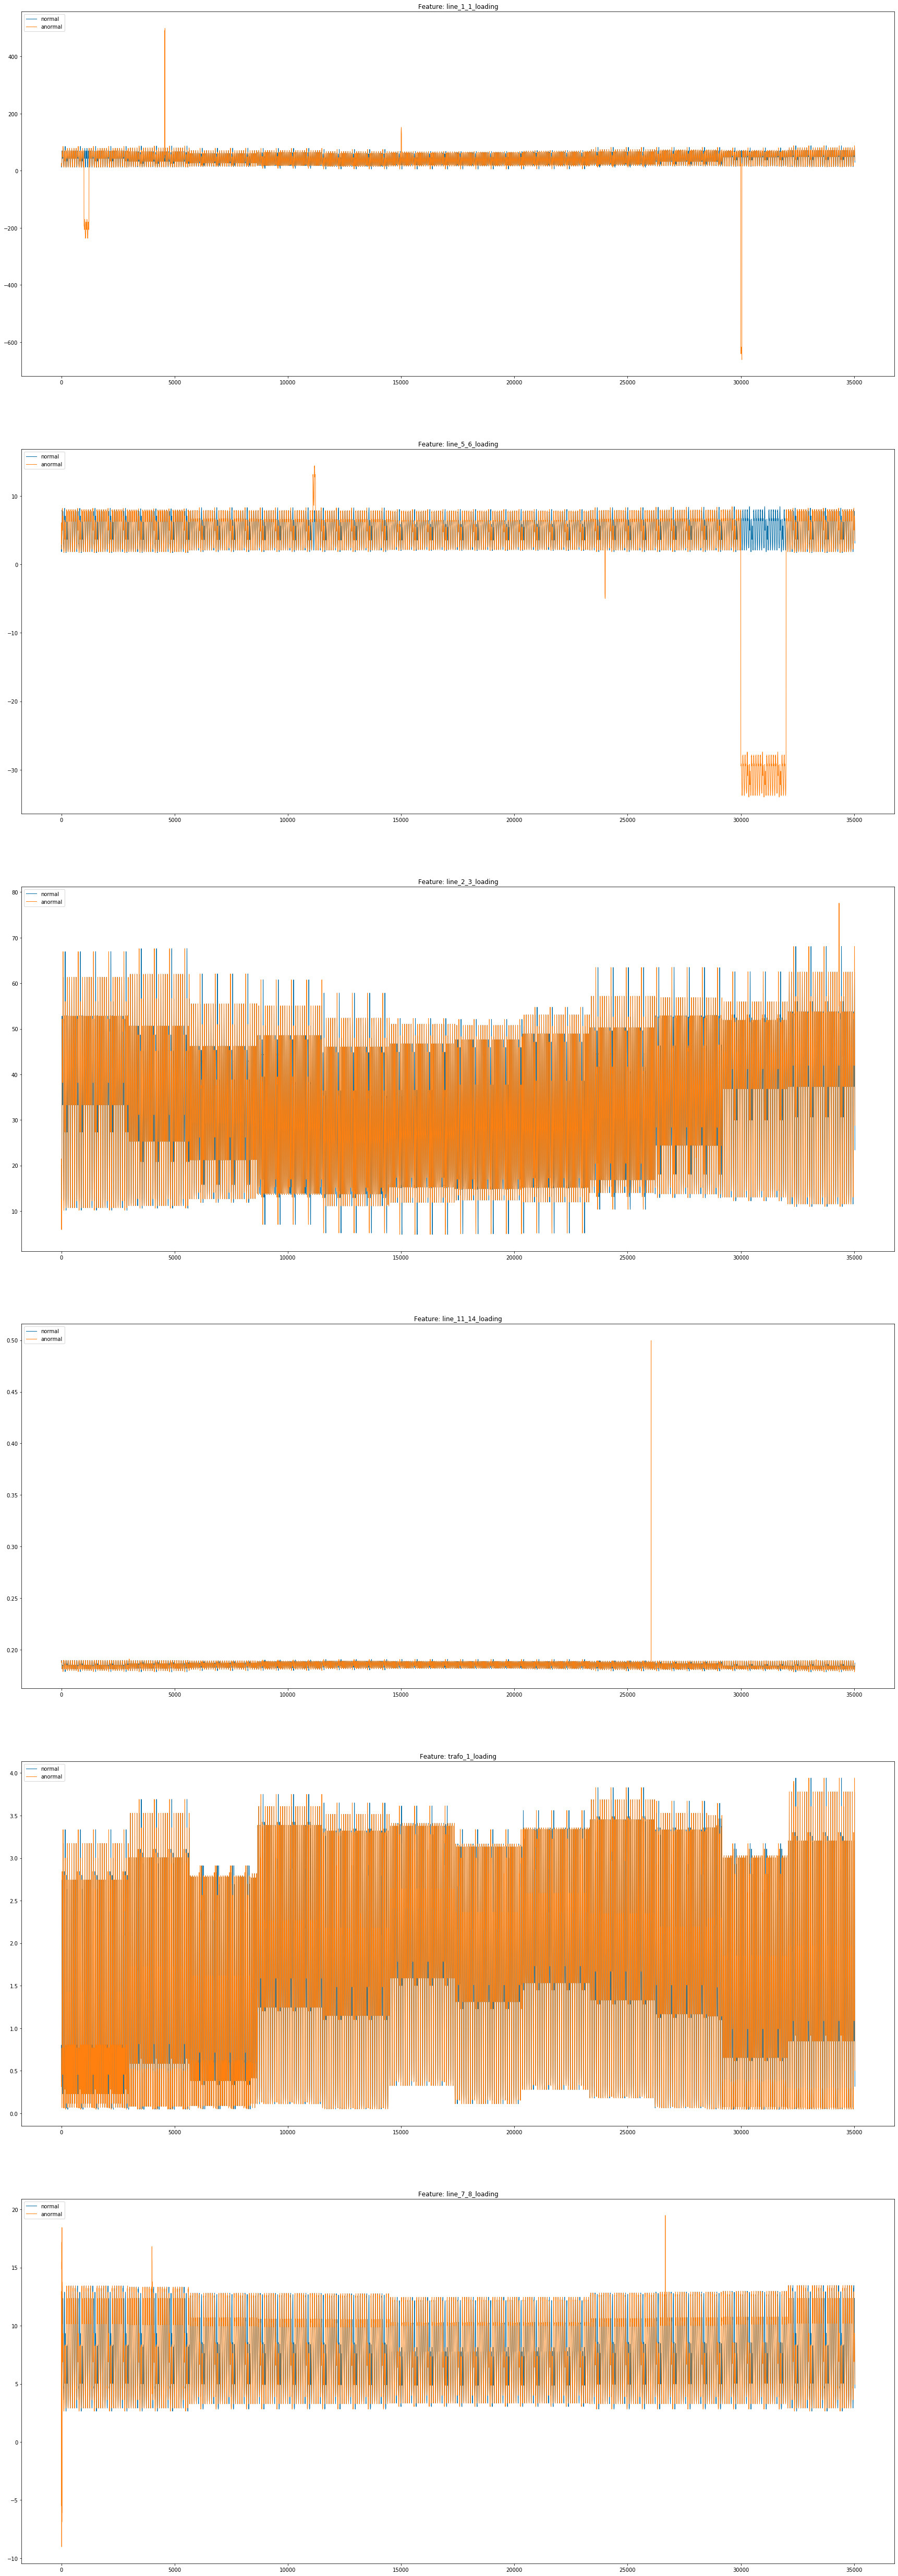

In [11]:
fig, ax = plt.subplots(len(cols), 1, figsize=(30, 15 * 6))
for i, col in enumerate(cols):
    _ = ax[i].plot(np.arange(len(normal_data[col])), normal_data[col], label='normal', lw=1)
    _ = ax[i].plot(np.arange(len(anormal_data[col])), anormal_data[col], label='anormal', lw=1)
    ax[i].set_title('Feature: {}'.format(col))
    _ = ax[i].legend(loc='upper left')

In [13]:
plot_data_anormal = anormal_data['trafo_0_loading'].iloc[11100:11200]
plot_data_normal = normal_data['trafo_0_loading'].iloc[11100:11200]

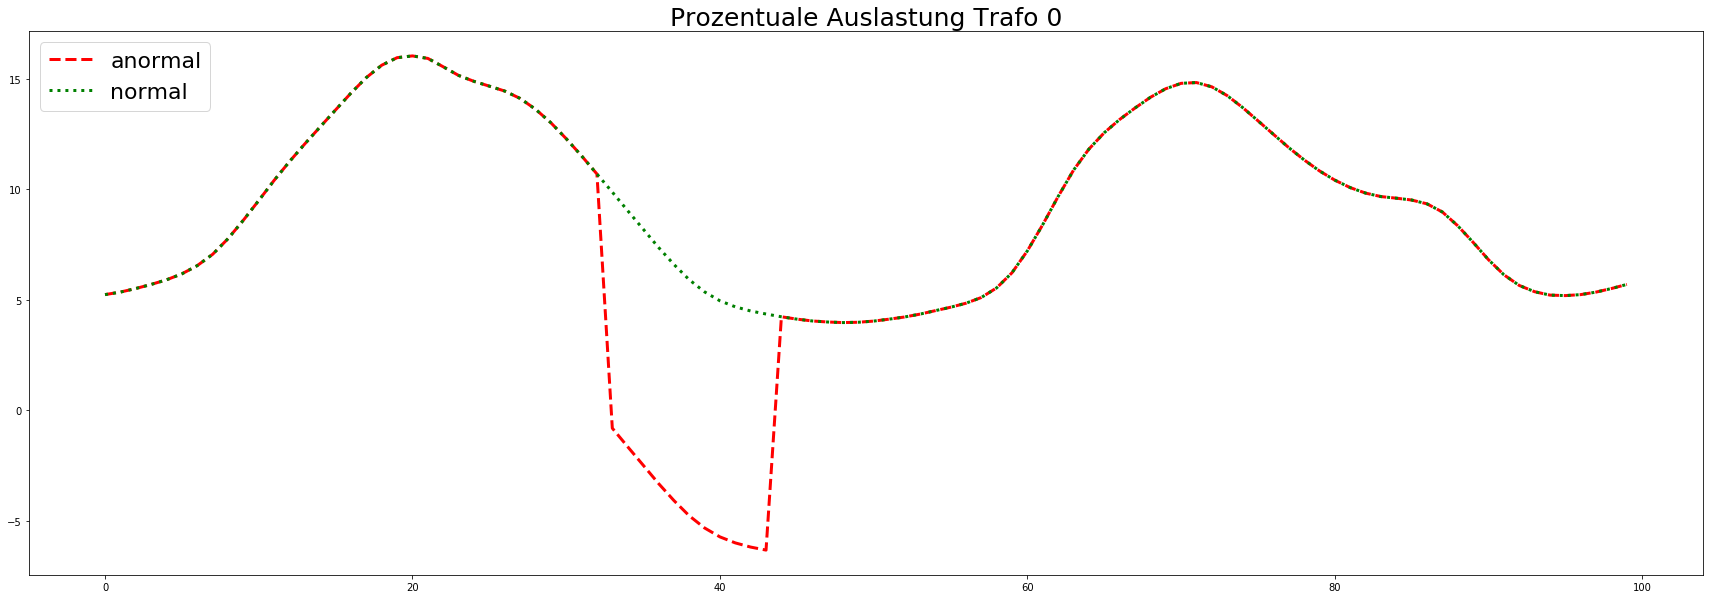

In [19]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(np.arange(len(plot_data_anormal)), plot_data_anormal, label='anormal', lw=3, color='red', linestyle='--')
ax.plot(np.arange(len(plot_data_normal)), plot_data_normal, label='normal', lw=3, color='green', linestyle=':')
ax.set_title('Prozentuale Auslastung Trafo 0', fontsize=25)
ax.legend(loc='upper left', fontsize=15, prop={"size":22})
fn = os.path.join(fig_fn, 'trafo_loading_anormal_normal.pdf')
plt.savefig(fn, bbox_inches = 'tight', pad_inches = 0) 

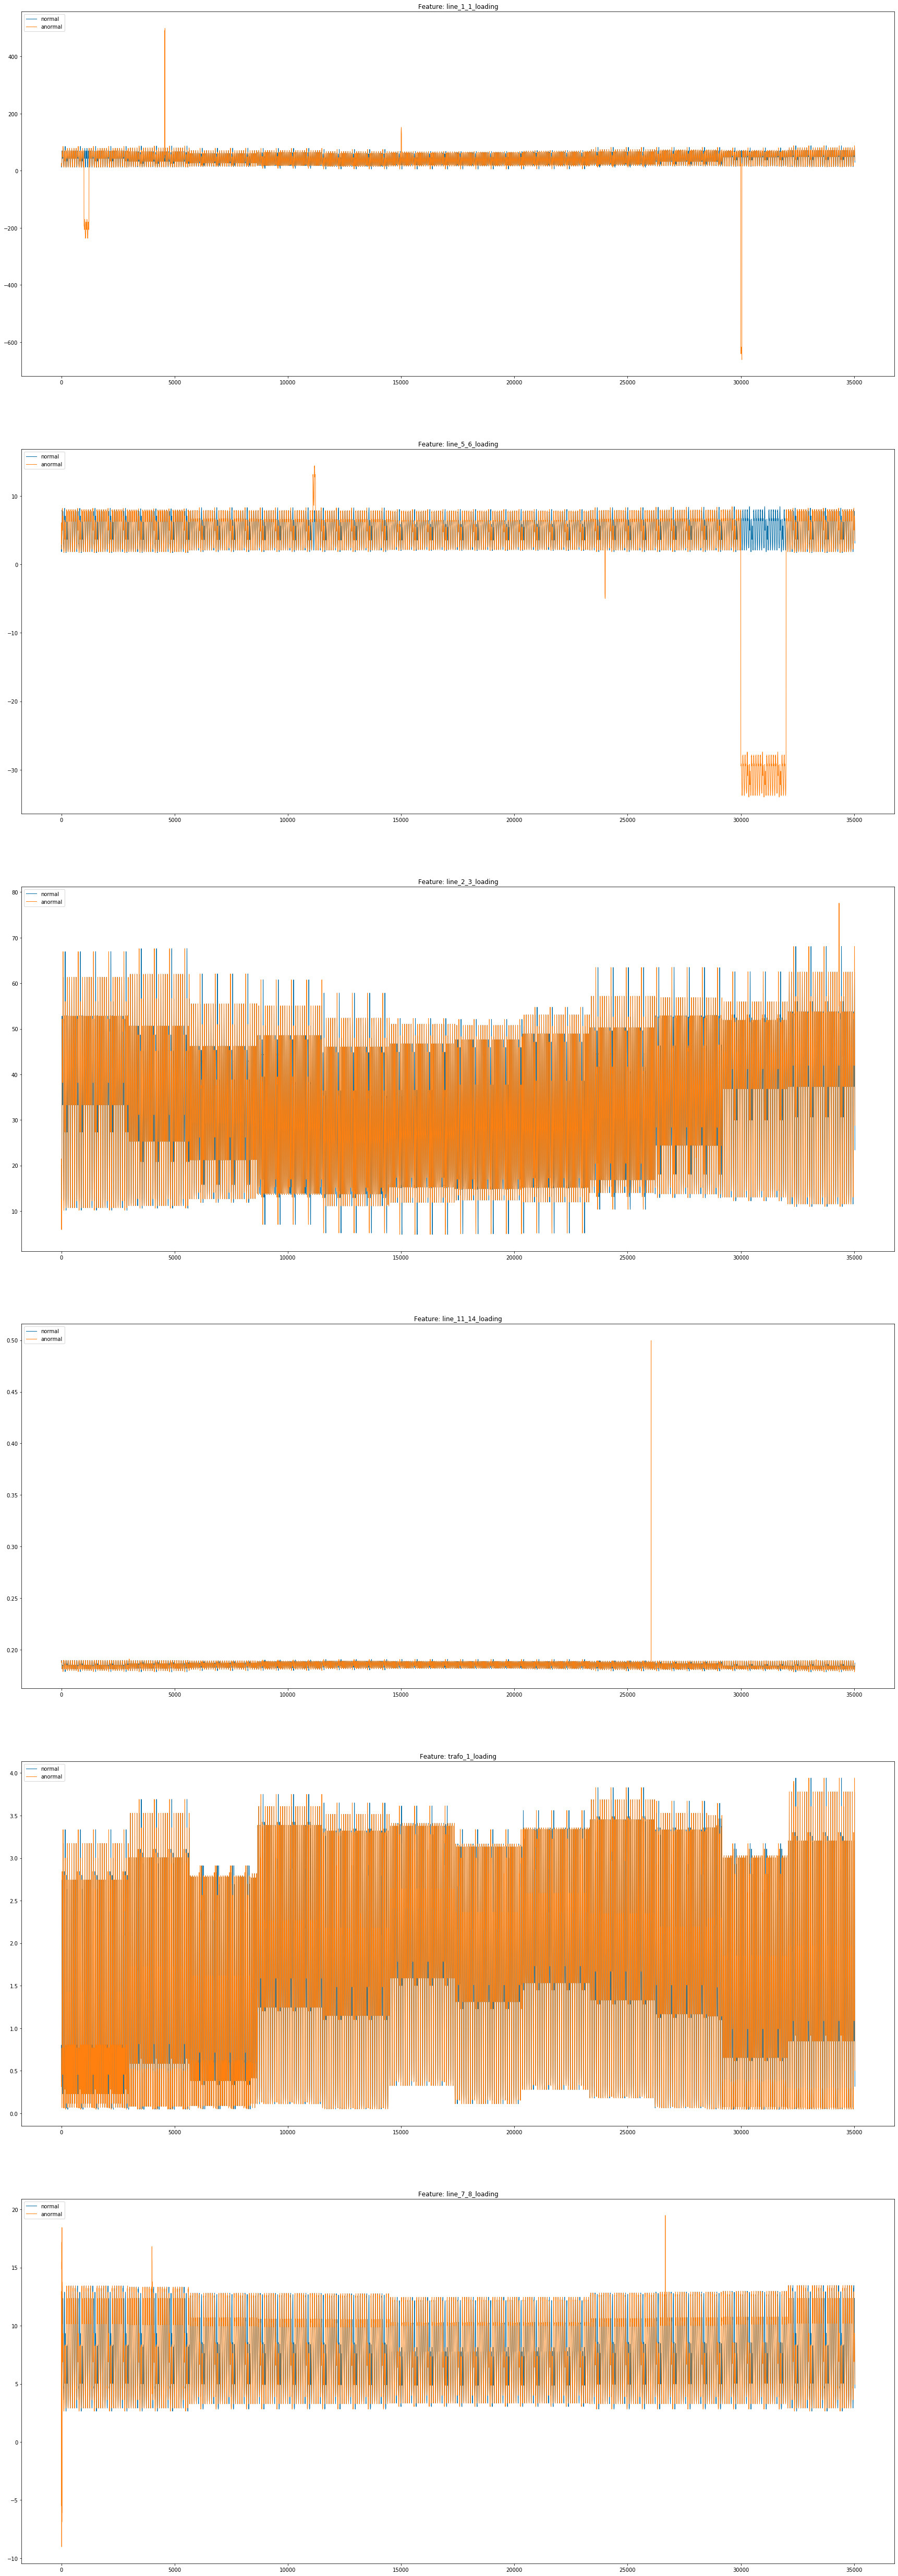

In [15]:
fig, ax = plt.subplots(len(cols), 1, figsize=(30, 15 * 6))
for i, col in enumerate(cols):
    _ = ax[i].plot(np.arange(len(normal_data[col])), normal_data[col], label='normal', lw=1)
    _ = ax[i].plot(np.arange(len(anormal_data[col])), anormal_data[col], label='anormal', lw=1)
    ax[i].set_title('Feature: {}'.format(col))
    _ = ax[i].legend(loc='upper left')